In [7]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [8]:
def count_live_neighbors(matrix, x, y):
    # Рахує кількість живих сусідів для даної клітинки (x, y)
    live_neighbors = 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue  # Пропускаємо саму клітинку
            if 0 <= x + i < matrix.shape[0] and 0 <= y + j < matrix.shape[1] and matrix[x + i][y + j] == 1:
                live_neighbors += 1
    return live_neighbors

In [9]:
def update_matrix(matrix):
    new_matrix = matrix.copy()
    for x in range(matrix.shape[0]):
        for y in range(matrix.shape[1]):
            live_neighbors = count_live_neighbors(matrix, x, y)
            if matrix[x][y] == 1:  # Жива клітинка
                if live_neighbors < 2 or live_neighbors > 3:
                    new_matrix[x][y] = 0  # Помирає
            else:  # Мертва клітинка
                if live_neighbors == 3:
                    new_matrix[x][y] = 1  # Оживає
    return new_matrix

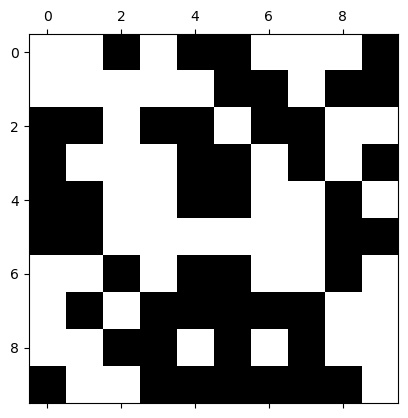

In [10]:
def random_matrix(rows, cols):
    # Генерує випадкову матрицю з розміром (rows, cols)
    return np.random.randint(2, size=(rows, cols), dtype=int)

# Задати розмір матриці
rows = 10
cols = 10

# Створити початкову випадкову матрицю
initial_matrix = random_matrix(rows, cols)

fig, ax = plt.subplots()
cax = ax.matshow(initial_matrix, cmap=plt.cm.gray)

In [11]:
def update(frame):
    global initial_matrix
    initial_matrix = update_matrix(initial_matrix)
    cax.set_array(initial_matrix)
    return cax

ani = animation.FuncAnimation(fig, update, frames=200, interval=1000)
plt.show()